## Project: Wrangling and Analyze WeRateDog Data

### by Anh Tran Thi Ngoc

# Gather 

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from bs4 import BeautifulSoup
import json
from timeit import default_timer as timer

In [2]:
#Read the csv file 
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Use Requests library to programatically download image-prediction.tsv file from website
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#Save image-predictions.tsv to file
with open('image-predictions.tsv', mode = 'wb') as file:
      file.write(response.content)

#Read the tsv file
df_image = pd.read_csv('image-predictions.tsv', sep='\t')


In [4]:
#Details of authentication
consumer_key = '0ay6PMVZDjKWyLW2l0MIngvo9'
consumer_secret = 'dmNM9Jsv8X4UoNKMzJO4SrKniHO4vePPHHfDKta8QfPSgarh2I'
access_token = '1349771496-rWVKU2BftkwHleOZcrt65jHpODwH5NHzscklMIc'
access_secret = 'hGMJE9kQB02NuxjF5jL3JeWQC3oHpJ3ouOFjprbvFv2Rr'

#Variables for Twitter API connections
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

In [5]:
#Fetch data from Twitter and append each tweet into a list
count = 0 
tweet_ids = df_twitter['tweet_id']

tweet_data = []
for tweet_id in tweet_ids:
    count += 1
    print(str(count))
    try:
        temp = api.get_status(tweet_id, tweet_mode='extended')._json
        tweet_data.append({'tweet_id':temp['id'],
                           'created_at':temp['created_at'],
                           'favorite_count':temp['favorite_count'],
                           'favorited':temp['favorited'],
                           'retweet_count':temp['retweet_count'],
                           'retweeted':temp['retweeted']})
        print(str(tweet_id) + ': done')
    except tweepy.TweepError as t:
        print('{} : {}'.format(tweet_id, t))

1
892420643555336193: done
2
892177421306343426: done
3
891815181378084864: done
4
891689557279858688: done
5
891327558926688256: done
6
891087950875897856: done
7
890971913173991426: done
8
890729181411237888: done
9
890609185150312448: done
10
890240255349198849: done
11
890006608113172480: done
12
889880896479866881: done
13
889665388333682689: done
14
889638837579907072: done
15
889531135344209921: done
16
889278841981685760: done
17
888917238123831296: done
18
888804989199671297: done
19
888554962724278272: done
20
888202515573088257 : [{'code': 144, 'message': 'No status found with that ID.'}]
21
888078434458587136: done
22
887705289381826560: done
23
887517139158093824: done
24
887473957103951883: done
25
887343217045368832: done
26
887101392804085760: done
27
886983233522544640: done
28
886736880519319552: done
29
886680336477933568: done
30
886366144734445568: done
31
886267009285017600: done
32
886258384151887873: done
33
886054160059072513: done
34
885984800019947520: done
3

Rate limit reached. Sleeping for: 681


758828659922702336: done
901
758740312047005698: done
902
758474966123810816: done
903
758467244762497024: done
904
758405701903519748: done
905
758355060040593408: done
906
758099635764359168: done
907
758041019896193024: done
908
757741869644341248: done
909
757729163776290825: done
910
757725642876129280: done
911
757611664640446465: done
912
757597904299253760: done
913
757596066325864448: done
914
757400162377592832: done
915
757393109802180609: done
916
757354760399941633: done
917
756998049151549440: done
918
756939218950160384: done
919
756651752796094464: done
920
756526248105566208: done
921
756303284449767430: done
922
756288534030475264: done
923
756275833623502848: done
924
755955933503782912: done
925
755206590534418437: done
926
755110668769038337: done
927
754874841593970688: done
928
754856583969079297: done
929
754747087846248448: done
930
754482103782404096: done
931
754449512966619136: done
932
754120377874386944: done
933
754011816964026368 : [{'code': 144, 'messag

Rate limit reached. Sleeping for: 679


676975532580409345: done
1802
676957860086095872: done
1803
676949632774234114: done
1804
676948236477857792: done
1805
676946864479084545: done
1806
676942428000112642: done
1807
676936541936185344: done
1808
676916996760600576: done
1809
676897532954456065: done
1810
676864501615042560: done
1811
676821958043033607: done
1812
676819651066732545: done
1813
676811746707918848: done
1814
676776431406465024: done
1815
676617503762681856: done
1816
676613908052996102: done
1817
676606785097199616: done
1818
676603393314578432: done
1819
676593408224403456: done
1820
676590572941893632: done
1821
676588346097852417: done
1822
676582956622721024: done
1823
676575501977128964: done
1824
676533798876651520: done
1825
676496375194980353: done
1826
676470639084101634: done
1827
676440007570247681: done
1828
676430933382295552: done
1829
676263575653122048: done
1830
676237365392908289: done
1831
676219687039057920: done
1832
676215927814406144: done
1833
676191832485810177: done
1834
6761463419

In [6]:
#Create a tweet_json.txt file for tweet data

with open('tweet_json.txt','w') as outfile:
    json.dump(tweet_data, outfile)

In [7]:
#Read data from tweet_json file
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)

In [8]:
#Create a data frame for tweet data
df_json = pd.DataFrame(data, columns = ['tweet_id', 'created_at', 'favorite_count', 'favorited', 'retweet_count', 'retweeted'])

# Assess

In [9]:
#Display full data frame information
pd.set_option('display.max_colwidth', -1)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


### Twitter Table

In [10]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


- tweet_id: unique tweet identifier
- in_reply_to_status_id:the status id of tweet reply to the tweet_id
- in_reply_to_user_id: the user id of tweet reply to the tweet id
- timestamp: time of the tweet
- source: where the tweet originated (Twitter iPhone, Vine, Twitter web, TweetDeck)
- text: the content of tweet
- retweeted_status_id: status identifier for retweets
- retweeted_status_user_id: user identifier for retweets
- retweeted_status_timestamp: time of retweet
- expanded_urls: the url where the tweet is housed
- rating_numerator: the numerator of rating
- rating_denominator: the denominator of rating
- name: given name of the dog
- doggo: dog stage (adult)
- floofer: dog stage (fluffy)
- pupper: dog stage (young)
- puppo: dog stage (transitioning from young to adult)

In [11]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_twitter.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [13]:
df_twitter.tweet_id.duplicated().sum()

0

In [14]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
df_twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [16]:
df_twitter.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [17]:
df_twitter.name.value_counts()

None        745
a           55 
Charlie     12 
Lucy        11 
Oliver      11 
            .. 
Cheesy      1  
DonDon      1  
Kingsley    1  
Berkeley    1  
Maisey      1  
Name: name, Length: 957, dtype: int64

In [18]:
#Some names (in lower case) are not real dog names
names = df_twitter.name
wrong_name = dict()
for i in names:
    if i[0].islower():
        if i not in wrong_name:
            wrong_name[i]=1
        else:
            wrong_name[i]=wrong_name[i]+1

wrong_name = pd.DataFrame.from_dict(data = wrong_name, orient = 'index', columns= ['Count'])
wrong_name

,Count
such,1
a,55
quite,4
not,2
one,4
incredibly,1
mad,2
an,7
very,5
just,4


In [19]:
df_twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [20]:
df_twitter.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [21]:
df_twitter.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [22]:
df_twitter.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [23]:
df_twitter.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

### Image Table

In [24]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- tweet_id is the last part of the tweet URL after "status/"
- p1 is the algorithm's #1 prediction for the image in the tweet
- p1_conf is how confident the algorithm is in its #1 prediction 
- p1_dog is whether or not the #1 prediction is a breed of dog 
- p2 is the algorithm's second most likely prediction 
- p2_conf is how confident the algorithm is in its #2 prediction 
- p2_dog is whether or not the #2 prediction is a breed of dog 

In [25]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
df_image.duplicated().sum()

0

In [28]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
df_image.p1.value_counts()

golden_retriever       150
Labrador_retriever     100
Pembroke               89 
Chihuahua              83 
pug                    57 
                       .. 
Madagascar_cat         1  
standard_schnauzer     1  
black-footed_ferret    1  
crane                  1  
bookcase               1  
Name: p1, Length: 378, dtype: int64

In [30]:
df_image.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [31]:
df_image.p2.value_counts()

Labrador_retriever    104
golden_retriever      92 
Cardigan              73 
Chihuahua             44 
Pomeranian            42 
                      .. 
washbasin             1  
academic_gown         1  
hay                   1  
dam                   1  
barracouta            1  
Name: p2, Length: 405, dtype: int64

In [32]:
df_image.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [33]:
df_image.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
consomme              1 
rain_barrel           1 
chimpanzee            1 
shoji                 1 
affenpinscher         1 
Name: p3, Length: 408, dtype: int64

In [34]:
df_image.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

In [35]:
#There are non-dog images in the image_prediction.tsv file
non_dog_image = df_image[(df_image['p1_dog'] == False) & (df_image['p2_dog'] ==False) & (df_image['p3_dog'] == False)]
non_dog_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [36]:
df_twitter.tweet_id.isin(df_image.tweet_id).value_counts()

True     2075
False    281 
Name: tweet_id, dtype: int64

###  JSON Table

In [37]:
df_json

,tweet_id,created_at,favorite_count,favorited,retweet_count,retweeted
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,36314,False,7729,False
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,31309,False,5721,False
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,23583,False,3786,False
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,39624,False,7889,False
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,37826,False,8508,False
...,...,...,...,...,...,...
2326,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,96,False,40,False
2327,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,272,False,132,False
2328,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,112,False,41,False
2329,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,121,False,42,False


In [38]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   int64 
 1   created_at      2331 non-null   object
 2   favorite_count  2331 non-null   int64 
 3   favorited       2331 non-null   bool  
 4   retweet_count   2331 non-null   int64 
 5   retweeted       2331 non-null   bool  
dtypes: bool(2), int64(3), object(1)
memory usage: 77.5+ KB


In [39]:
df_json.duplicated().sum()

0

In [40]:
df_json.tweet_id.isin(df_image.tweet_id).value_counts()

True     2059
False    272 
Name: tweet_id, dtype: int64

In [41]:
df_json.created_at.isin(df_twitter.timestamp).value_counts()

False    2331
Name: created_at, dtype: int64

#### Quality
##### df_twitter table
- Columns with missing values: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
- 181 records for retweets (we only focus on original tweets)
- Timestamp has a data type of datetime instead of object
- Some values in rating numerator and rating denominator are wrongly extracted from text.
- Different rating_denominator will make it hard to compare which dog has higher rating. 
- Source should be written in text instead of url
- Improper dog's name extraction should be changed to "None"
- Many tweet_id in df_twitter table are missing in df_image table

##### df_image table
- Lowercase in p1, p2, p3 columns
- Non-dog images

##### df_json table
- Created_at is duplicated with timestamp in df_twitter table
- Many tweet_id in df_json table are missing in df_image table

#### Tidiness
##### df_twitter table
- Four columns (doggo, floofer, pupper, puppo) should be integrated in to one column dog_stage.
- Parse year, month, date from timestamp for analysis.
- Merge table df_json, df_twitter and df_imange

# Clean

In [42]:
twitter_clean = df_twitter.copy()
image_clean = df_image.copy()
json_clean = df_json.copy()

### I. Table Twitter

### Missing Data

##### Define
- In the twitter table, remove 181 retweeted rows and then drop columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- Drop columns in_reply_to_status_id, in_reply_to_user_id because of unnecessity.

##### Code

In [43]:
twitter_clean.drop(twitter_clean[twitter_clean.retweeted_status_user_id.notnull()].index, inplace = True)
twitter_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id','expanded_urls' ], axis= 1, inplace = True)

##### Test

In [44]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Tidiness

##### Define
Combine four columns (doggo, floofer, pupper, puppo) into one column called dog_stage. After that, remove these four columns. 

##### Code

In [45]:
#Replace "None" with blank space in 4 columns doggo, floofer, pupper and puppo
twitter_clean.doggo.replace('None', '', inplace = True)
twitter_clean.floofer.replace('None', '', inplace = True)
twitter_clean.pupper.replace('None', '', inplace = True)
twitter_clean.puppo.replace('None', '', inplace = True)

In [46]:
#Create a new column dog_stage
twitter_clean['dog_stage'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo

In [47]:
#Rename and reformat values in dog_stage column
twitter_clean.loc[twitter_clean.dog_stage == 'pupper', 'dog_stage'] = 'Pupper'
twitter_clean.loc[twitter_clean.dog_stage == 'doggo', 'dog_stage'] = 'Doggo'
twitter_clean.loc[twitter_clean.dog_stage == 'puppo', 'dog_stage'] = 'Puppo'
twitter_clean.loc[twitter_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'Doggo, Pupper'
twitter_clean.loc[twitter_clean.dog_stage == 'floofer', 'dog_stage'] = 'Floofer'
twitter_clean.loc[twitter_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'Doggo, Floofer'
twitter_clean.loc[twitter_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'Doggo, Puppo'

In [48]:
#Drop 4 columns doggo, floofer, puper and pupo
twitter_clean.drop(['doggo', 'floofer', 'pupper','puppo'], axis =1, inplace = True)

##### Test

In [49]:
#list all columns
twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [50]:
twitter_clean.dog_stage.value_counts()

                  1831
Pupper            224 
Doggo             75  
Puppo             24  
Doggo, Pupper     10  
Floofer           9   
Doggo, Puppo      1   
Doggo, Floofer    1   
Name: dog_stage, dtype: int64

In [51]:
twitter_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
2239,667937095915278337,2015-11-21 05:26:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dog resembles a baked potato. Bed looks uncomfortable. No tail. Comes with butter tho. 3/10 petting still fun https://t.co/x89NSCEZCq,3,10,None,
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,
170,859074603037188101,2017-05-01 15:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an exotic dog. Good at ukulele. Fashionable af. Has two more arms if needed. Is blue. Knows what 'ohana means. 13/10 would pet https://t.co/gEsymGTXCT,13,10,None,
235,847606175596138505,2017-03-31 00:27:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cannon. He just heard something behind him. Fr*ckin frightened af. 12/10 don't look back just run https://t.co/WTPBWT6Ux1,12,10,Cannon,
1452,695767669421768709,2016-02-06 00:35:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",If you are aware of who is making these please let me know. 13/10 vroom vroom https://t.co/U0D1sbIDrG,13,10,None,


##### Define

- Convert timestamp from object to datetime 
- Extract year, month, date from timestamp and save in 3 different columns

##### Code


In [52]:
from datetime import date

#Convert timestamp from object to datetime
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

#Extract year, month, date
twitter_clean['year'] = twitter_clean.timestamp.dt.year
twitter_clean['month'] = twitter_clean.timestamp.dt.month
twitter_clean['day']= twitter_clean.timestamp.dt.day

#Create a weekday column
twitter_clean['weekday']= twitter_clean.timestamp.dt.dayofweek
days = {0:'Monday', 1: 'Tuesday', 2:'Wednesday', 3:'Thursday',4:'Friday', 5:'Saturday', 6:'Sunday'}
twitter_clean.weekday = twitter_clean.weekday.apply(lambda x: days[x])

##### Test

In [53]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   dog_stage           2175 non-null   object             
 8   year                2175 non-null   int64              
 9   month               2175 non-null   int64              
 10  day                 2175 non-null   int64              
 11  weekday             2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(6

In [54]:
twitter_clean.year.value_counts()

2016    1088
2015    688 
2017    399 
Name: year, dtype: int64

In [55]:
twitter_clean.month.value_counts()

12    447
11    358
1     265
2     197
3     193
7     150
6     144
4     109
5     105
10    73 
9     69 
8     65 
Name: month, dtype: int64

In [56]:
twitter_clean.weekday.value_counts()

Monday       357
Tuesday      326
Wednesday    322
Friday       305
Thursday     305
Saturday     284
Sunday       276
Name: weekday, dtype: int64

In [57]:
twitter_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,year,month,day,weekday
991,748699167502000129,2016-07-01 02:06:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Tripp. He's being eaten by a sherk and doesn't even care. Unfazed af. 11/10 keep doin you Tripp https://t.co/gGxjthmG1c,11,10,Tripp,,2016,7,1,Friday
805,772114945936949249,2016-09-03 16:52:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Finn. He's very nervous for the game. Has a lot of money riding on it.10/10 would attempt to comfort https://t.co/CbtNfecWiT,10,10,Finn,,2016,9,3,Saturday
26,886983233522544640,2017-07-17 16:17:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maya. She's very shy. Rarely leaves her cup. 13/10 would find her an environment to thrive in https://t.co/I6oNy0CgiT,13,10,Maya,,2017,7,17,Monday
1630,684538444857667585,2016-01-06 00:54:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After watching this video, we've determined that Pippa will be upgraded to a 12/10. Please enjoy https://t.co/IKoRK4yoxV",12,10,None,,2016,1,6,Wednesday
2144,669942763794931712,2015-11-26 18:16:16+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Andru. He made his very own lacrosse stick. Much dedication. Big dreams. Tongue slip. 11/10 go get em Andru https://t.co/1VJoY3OJ1F,11,10,Andru,,2015,11,26,Thursday


### Quality

##### Define

Change the source column from url to text 

##### Code

In [58]:
twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [59]:
source_map = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
         '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
         '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine - Make a Scene', 
         '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}

def source_text(twitter_clean):
    if twitter_clean.source in source_map.keys():
        abbrev = source_map[twitter_clean.source]
        return abbrev
    else:
        return twitter_clean.source

twitter_clean.source = twitter_clean.apply(source_text, axis = 1)

##### Test

In [60]:
twitter_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

In [61]:
twitter_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,year,month,day,weekday
1614,685307451701334016,2016-01-08 03:50:03+00:00,Twitter for iPhone,Say hello to Petrick. He's an Altostratus Floofer. Just had a run in with a trash bag. Groovy checkered floor. 11/10 https://t.co/rwW7z1JAOF,11,10,Petrick,Floofer,2016,1,8,Friday
2112,670435821946826752,2015-11-28 02:55:30+00:00,Twitter for iPhone,Two unbelievably athletic dogs here. Great form. Perfect execution. 10/10 for both https://t.co/sQuKwSKtDE,10,10,None,,2015,11,28,Saturday
2085,670804601705242624,2015-11-29 03:20:54+00:00,Twitter for iPhone,Meet Mason. He's a total frat boy. Pretends to be Hawaiian. Head is unbelievably round. 10/10 would pet so damn well https://t.co/DM3ZP3AA7b,10,10,Mason,,2015,11,29,Sunday
1188,718454725339934721,2016-04-08 15:05:29+00:00,Twitter for iPhone,"This pic is old but I hadn't seen it until today and had to share. Creative af. 13/10 very good boy, would pet well https://t.co/4kD16wMA1Z",13,10,None,,2016,4,8,Friday
2224,668291999406125056,2015-11-22 04:56:43+00:00,Twitter for iPhone,I can't do better than he did. 10/10 https://t.co/fM0KXns7Or,10,10,None,,2015,11,22,Sunday


##### Define
Check all the supicious values of rating_denominator (different from 10) and rating_numerator (count value is smaller than 9) and correct data if it is improperly extracted


##### Code

In [62]:
#Locate to the tweets which have rating_denominator <> 10
twitter_clean[twitter_clean.rating_denominator != 10][['tweet_id','text','rating_numerator' ,'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


In [63]:
#Since the number of improper extraction of rating_denominator is small, I correct them manually

#drop data with no rating
twitter_clean.drop(twitter_clean[twitter_clean.tweet_id == 832088576586297345].index, axis = 0, inplace = True)
twitter_clean.drop(twitter_clean[twitter_clean.tweet_id == 810984652412424192].index, axis = 0, inplace = True)

#fix data
twitter_clean.loc[twitter_clean.tweet_id == 835246439529840640, 'rating_denominator'] = 10
twitter_clean.loc[twitter_clean.tweet_id == 835246439529840640, 'rating_numerator'] = 13

twitter_clean.loc[twitter_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10
twitter_clean.loc[twitter_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14

twitter_clean.loc[twitter_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10
twitter_clean.loc[twitter_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13

twitter_clean.loc[twitter_clean.tweet_id ==716439118184652801, 'rating_denominator'] = 11
twitter_clean.loc[twitter_clean.tweet_id ==716439118184652801, 'rating_numerator'] = 10

twitter_clean.loc[twitter_clean.tweet_id ==666287406224695296, 'rating_denominator'] = 10
twitter_clean.loc[twitter_clean.tweet_id ==666287406224695296, 'rating_numerator'] = 9



In [64]:
#locate to tweets which have total number of rating_numerator less than 15
#create a data frame which saves the result of value_counts of rating_numerator
numerator_val = twitter_clean.rating_numerator.value_counts().rename_axis('unique_values').reset_index(name='counts')

#save those unique values which have counts <15 to a list
check_numerator_val = numerator_val[numerator_val.counts < 15]['unique_values']

#return the tweets and check 
twitter_clean[twitter_clean.rating_numerator.isin(check_numerator_val)][['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150


In [65]:
#Manually correct if data has an issue

twitter_clean.loc[twitter_clean.tweet_id ==786709082849828864, 'rating_numerator'] = 9.75

twitter_clean.loc[twitter_clean.tweet_id ==778027034220126208, 'rating_numerator'] = 11.27

twitter_clean.loc[twitter_clean.tweet_id ==680494726643068929, 'rating_numerator'] = 11.26

##### Test

In [66]:
twitter_clean.rating_numerator.value_counts()

12.00      500
10.00      443
11.00      425
13.00      309
9.00       156
8.00       98 
7.00       54 
14.00      44 
5.00       36 
6.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       7  
0.00       2  
420.00     2  
84.00      1  
80.00      1  
15.00      1  
17.00      1  
143.00     1  
60.00      1  
121.00     1  
20.00      1  
144.00     1  
88.00      1  
11.26      1  
11.27      1  
99.00      1  
666.00     1  
9.75       1  
1776.00    1  
204.00     1  
45.00      1  
165.00     1  
182.00     1  
44.00      1  
Name: rating_numerator, dtype: int64

In [67]:
twitter_clean.rating_denominator.value_counts()

10     2157
11     2   
80     2   
50     2   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
16     1   
Name: rating_denominator, dtype: int64

##### Define
Add a column rating_score which is calculated by rating_numerator devided by rating_denominator so that it easier to compare the rating score between dogs. Then, drop 2 columns rating_denominator and rating_numerator

##### Code

In [68]:
twitter_clean['rating_score'] = twitter_clean['rating_numerator']/twitter_clean['rating_denominator']
twitter_clean.drop(['rating_numerator','rating_denominator'], axis = 1, inplace = True)

##### Test

In [69]:
twitter_clean.rating_score.value_counts()

1.200000      504
1.000000      443
1.100000      431
1.300000      309
0.900000      157
0.800000      98 
0.700000      53 
1.400000      44 
0.500000      36 
0.600000      32 
0.300000      19 
0.400000      15 
0.200000      10 
0.100000      7  
42.000000     2  
0.000000      2  
66.600000     1  
1.500000      1  
1.250000      1  
18.200000     1  
0.975000      1  
0.909091      1  
177.600000    1  
1.127000      1  
1.126000      1  
1.700000      1  
0.636364      1  
Name: rating_score, dtype: int64

In [70]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   tweet_id      2173 non-null   int64              
 1   timestamp     2173 non-null   datetime64[ns, UTC]
 2   source        2173 non-null   object             
 3   text          2173 non-null   object             
 4   name          2173 non-null   object             
 5   dog_stage     2173 non-null   object             
 6   year          2173 non-null   int64              
 7   month         2173 non-null   int64              
 8   day           2173 non-null   int64              
 9   weekday       2173 non-null   object             
 10  rating_score  2173 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 203.7+ KB


##### Define

Get a list of wrong names which do not start with uppercase and are not "None". Then, change those names to "None"

##### Code

In [71]:
wrong_names =[]
for i in twitter_clean.name:
    if i not in wrong_names and i.islower():
        wrong_names.append(i)

twitter_clean.loc[twitter_clean.name.isin(wrong_names), 'name'] = 'None'   

##### Test

In [72]:
twitter_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [73]:
set(twitter_clean.name.unique()).intersection(wrong_names)

set()

### II. Table Image

### Quality

##### Define
Convert the first character of string in p1, p2, p3 column to capital letter

##### Code

In [74]:
image_clean.p1 = image_clean.p1.str.capitalize()
image_clean.p2 = image_clean.p2.str.capitalize()
image_clean.p3 = image_clean.p3.str.capitalize()

##### Test

In [75]:
image_clean[['p1', 'p2','p3']].sample(10)

,p1,p2,p3
972,Space_heater,Chihuahua,Cougar
669,Koala,Eskimo_dog,Wallaby
716,Lakeland_terrier,Airedale,Three-toed_sloth
1420,Papillon,Collie,Border_collie
498,Basset,Beagle,Bloodhound
1662,Staffordshire_bullterrier,French_bulldog,Doormat
2064,Samoyed,Pomeranian,Chow
340,Irish_terrier,Airedale,Toy_poodle
289,African_hunting_dog,Plow,Scottish_deerhound
2068,Appenzeller,Border_collie,Ice_lolly


##### Define
Create a column called pred_result to store three values:
- 'Dog' if p1_dog, p2_dog, p3_dog are True
- 'Not Dog' if if p1_dog, p2_dog, p3_dog are False
- 'Maybe Dog' in other cases

##### Code

In [76]:
results = ['p1_dog', 'p2_dog', 'p3_dog']

#Convert True, False value to integer
for i in results:
    image_clean[i] = image_clean[i].astype(int)
    
image_clean['pred_results'] = image_clean.p1_dog + image_clean.p2_dog + image_clean.p3_dog

image_clean['pred_results'] = image_clean.pred_results.replace(3, 'Dog')
image_clean['pred_results'] = image_clean.pred_results.replace(0, 'Not Dog')
image_clean['pred_results'] = image_clean.pred_results.replace(1, 'Maybe Dog')
image_clean['pred_results'] = image_clean.pred_results.replace(2, 'Maybe Dog')

#Drop p1_dog, p2_dog, p3_dog
image_clean.drop(['p1_dog', 'p2_dog','p3_dog'], axis = 1, inplace = True)

##### Test

In [77]:
image_clean.pred_results.value_counts()

Dog          1243
Maybe Dog    508 
Not Dog      324 
Name: pred_results, dtype: int64

In [78]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2075 non-null   int64  
 1   jpg_url       2075 non-null   object 
 2   img_num       2075 non-null   int64  
 3   p1            2075 non-null   object 
 4   p1_conf       2075 non-null   float64
 5   p2            2075 non-null   object 
 6   p2_conf       2075 non-null   float64
 7   p3            2075 non-null   object 
 8   p3_conf       2075 non-null   float64
 9   pred_results  2075 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 162.2+ KB


##### Define

Remove jpg_url, img_num, p1_conf, p2_cof, p3_conf because of unnecessity for this project.

##### Code


In [79]:
image_clean.drop(['jpg_url', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf'], axis = 1, inplace = True)

##### Test

In [80]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      2075 non-null   int64 
 1   p1            2075 non-null   object
 2   p2            2075 non-null   object
 3   p3            2075 non-null   object
 4   pred_results  2075 non-null   object
dtypes: int64(1), object(4)
memory usage: 81.2+ KB


In [81]:
image_clean.sample(5)

,tweet_id,p1,p2,p3,pred_results
1396,767884188863397888,Coral_reef,Cliff,Lakeside,Not Dog
464,675003128568291329,Pembroke,Pomeranian,Cardigan,Dog
713,685325112850124800,Golden_retriever,Labrador_retriever,Kuvasz,Dog
1799,831670449226514432,Pembroke,Cardigan,Appenzeller,Dog
1125,727314416056803329,Toy_poodle,Miniature_poodle,Tibetan_terrier,Dog


### III. JSON table

### Quality

In [82]:
json_clean.sample(5)

,tweet_id,created_at,favorite_count,favorited,retweet_count,retweeted
393,823333489516937216,Mon Jan 23 00:56:15 +0000 2017,711,False,25,False
1291,706681918348251136,Mon Mar 07 03:24:33 +0000 2016,3298,False,971,False
1119,727314416056803329,Tue May 03 01:50:44 +0000 2016,3328,False,740,False
437,818588835076603904,Mon Jan 09 22:42:41 +0000 2017,0,False,6275,False
1761,677573743309385728,Thu Dec 17 19:39:03 +0000 2015,2105,False,695,False


##### Define
- Remove created_at column because of duplication with timestamp
- Remove columns favorited and retweeted because of having only False value

##### Code

In [83]:
json_clean.drop(['created_at','retweeted', 'favorited'], axis =1, inplace = True)

##### Test

In [84]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


##### Data in three tables have been cleaned. A master data will be created by joining three tables using tweet_id

In [85]:
twitter_archive_master = pd.merge(twitter_clean, image_clean, how='inner', on = 'tweet_id')
twitter_archive_master = pd.merge(twitter_archive_master, json_clean, how = 'inner', on='tweet_id')

In [86]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1986 non-null   int64              
 1   timestamp       1986 non-null   datetime64[ns, UTC]
 2   source          1986 non-null   object             
 3   text            1986 non-null   object             
 4   name            1986 non-null   object             
 5   dog_stage       1986 non-null   object             
 6   year            1986 non-null   int64              
 7   month           1986 non-null   int64              
 8   day             1986 non-null   int64              
 9   weekday         1986 non-null   object             
 10  rating_score    1986 non-null   float64            
 11  p1              1986 non-null   object             
 12  p2              1986 non-null   object             
 13  p3              1986 non-null   o

In [87]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,name,dog_stage,year,month,day,weekday,rating_score,p1,p2,p3,pred_results,favorite_count,retweet_count
944,712809025985978368,2016-03-24 01:11:29+00:00,Twitter for iPhone,This is Stubert. He just arrived. 10/10 https://t.co/HVGs5aAKAn,Stubert,,2016,3,24,Thursday,1.0,Labrador_retriever,Carton,Pug,Maybe Dog,18501,6676
1421,678334497360859136,2015-12-19 22:02:01+00:00,Twitter for iPhone,This is Rosie. She has a snazzy bow tie and a fin for a tail. Probably super fast underwater. Cool socks 10/10 https://t.co/GO76MdGBs0,Rosie,,2015,12,19,Saturday,1.0,Norfolk_terrier,Golden_retriever,Kelpie,Dog,1295,249
1030,705475953783398401,2016-03-03 19:32:29+00:00,Twitter for iPhone,Say hello to Zara. She found a sandal and couldn't be happier. 12/10 great work https://t.co/zQUuVu812n,Zara,,2016,3,3,Thursday,1.2,Golden_retriever,Labrador_retriever,Tennis_ball,Maybe Dog,2956,912
1133,696713835009417216,2016-02-08 15:14:57+00:00,Twitter for iPhone,This is Trevith. He's a Swiss Mountain Roadwoof. Breeze too powerful. 9/10 stay strong pupper https://t.co/6J8Ibwy1X6,Trevith,Pupper,2016,2,8,Monday,0.9,Car_mirror,Chesapeake_bay_retriever,Vizsla,Maybe Dog,2366,653
227,836001077879255040,2017-02-26 23:52:43+00:00,Twitter for iPhone,Atlas is back and this time he's prettier than the sunset. Seems to be aware of it too. 13/10 would give modeling contract https://t.co/uRdKlFArQE,None,,2017,2,26,Sunday,1.3,Samoyed,White_wolf,Malamute,Maybe Dog,19185,4282


In [88]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

### DATA EXPLORATION AND VISUALIZATION

In [90]:
! pip install wordcloud

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [91]:
pd.set_option('display.max_columns', None)

#### Question 1: What are some of the most popular dog's name?

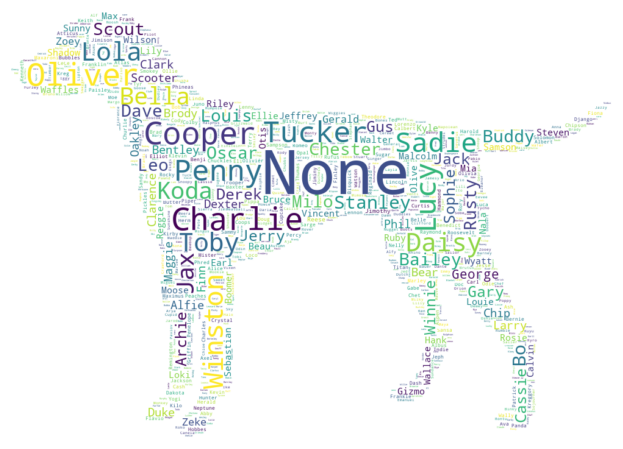

<Figure size 432x288 with 0 Axes>

In [92]:
import urllib.request

# Download a dog image
urllib.request.urlretrieve("https://www.clipartqueen.com/image-files/dog-silhouette-dalmatiner.jpg", "dog.jpg")

#Create a single text of all dog's names 
texts = twitter_archive_master.name.str.cat(sep=' ')

# Creat stopword list
stopwords = set(STOPWORDS)
stopwords.add('None')

# Read the mask image
dog_mask = np.array(Image.open('dog.jpg'))

# Create a wordcloud image
wc = WordCloud(background_color="white", max_words=2000, mask=dog_mask, stopwords=stopwords)

# Generate word cloud
wc.generate(texts)

# Store to file
wc.to_file("dog_wordcloud.png")

# Show
plt.figure(figsize=[12,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

#### Question 2: What are some of the most popular dog breed?

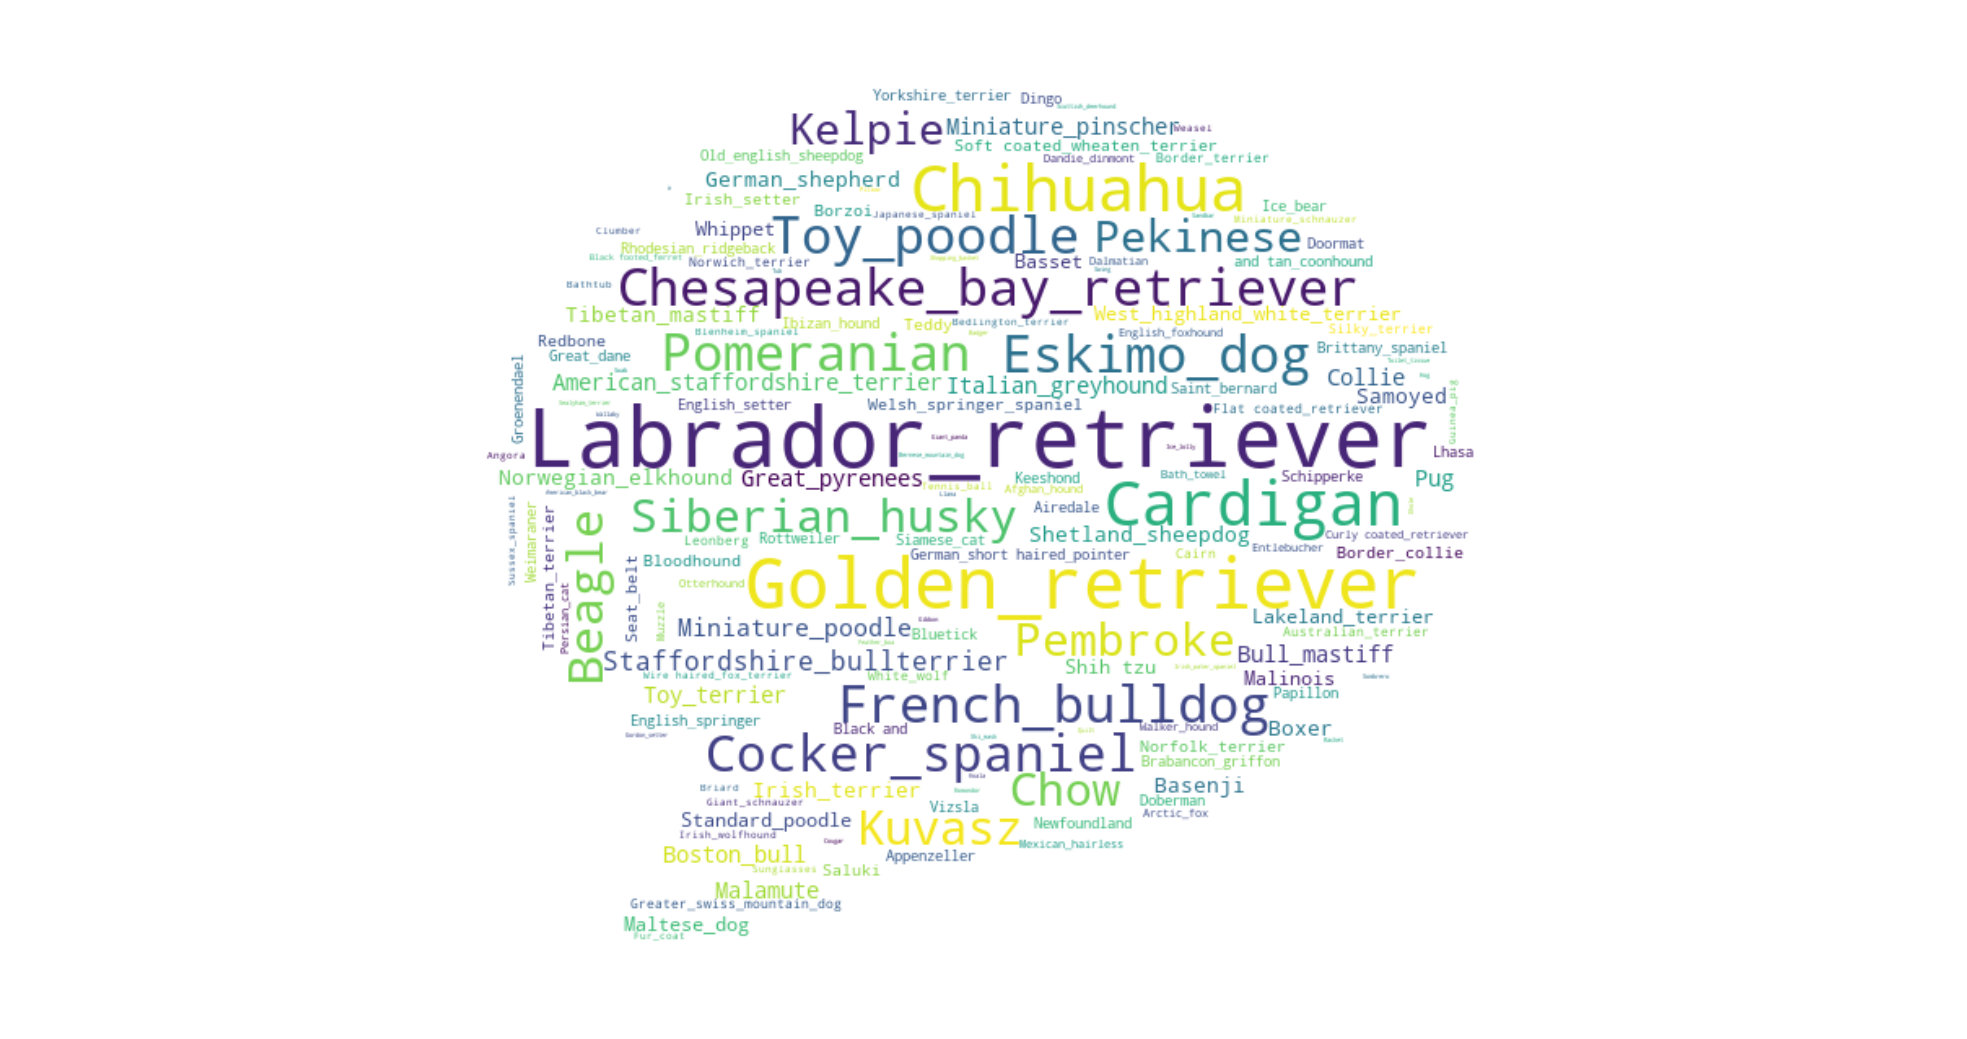

<Figure size 432x288 with 0 Axes>

In [93]:
#Creat a list of predected dog beed
breed = twitter_archive_master.loc[twitter_archive_master.pred_results.isin(['Dog', 'Maybe Dog']), ['p1','p2','p3']]
breed_text = breed.p1.str.cat(sep ='') + breed.p2.str.cat(sep=' ') + breed.p3.str.cat(sep=' ')


# Download a dog image
urllib.request.urlretrieve("https://imageog.flaticon.com/icons/png/512/71/71580.png?size=1200x630f&pad=10,10,10,10&ext=png&bg=FFFFFFFF", 'breed.jpg')

breed_mask = np.array(Image.open('breed.jpg'))
                         
# Create a wordcloud image
wc = WordCloud(background_color="white", max_words=2000, mask = breed_mask, stopwords=stopwords)

# Generate word cloud
wc.generate(breed_text)

# Store to file
wc.to_file("breed_wordcloud.png")

# Show
plt.figure(figsize=[35,35])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()


#### Question 3: What is the most popular stage of dog at WeRateDogs?

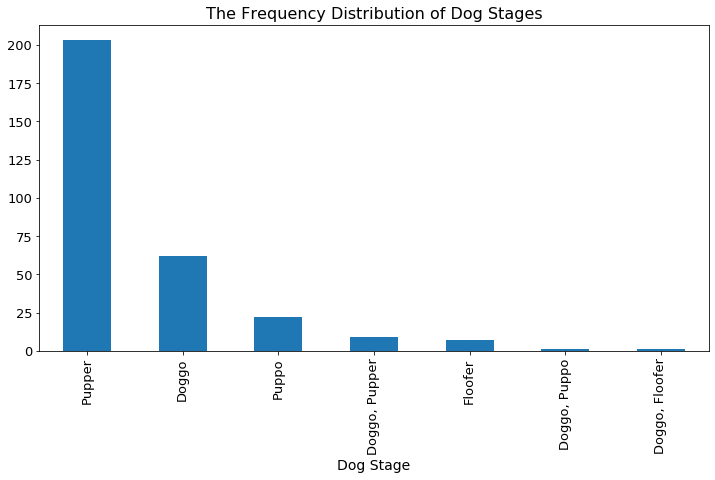

In [94]:
# Extract data for dog stages
stage_data = twitter_archive_master.dog_stage.value_counts()[1:]

# Plot bar chart
stage_data.plot(kind ='bar', figsize = (12,6))

# Configure bar chart

plt.title ('The Frequency Distribution of Dog Stages', size = 16)
plt.xlabel('Dog Stage', size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13);

#### Question 4: Which dog breeds are most retweeted?

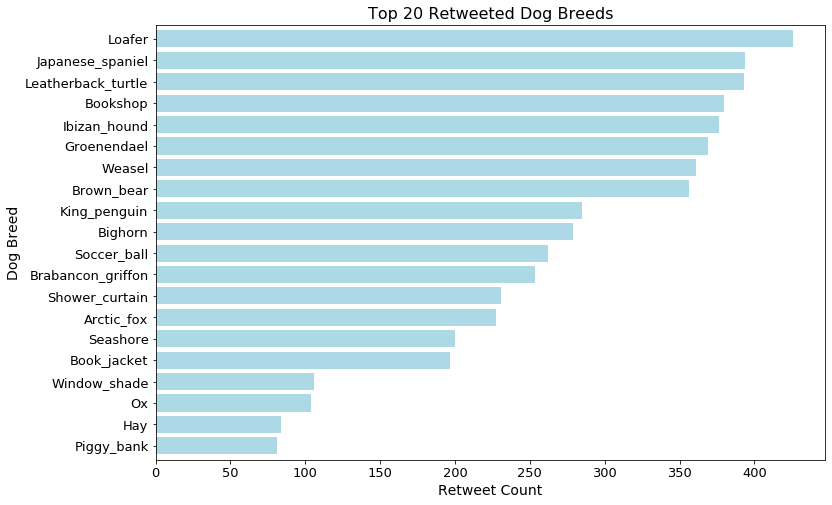

In [95]:
# Create a data frame which doesn't include the prediction of "Not Dog"
twitter_archive_master_dog = twitter_archive_master.query('pred_results =="Dog" or pred_results == "Maybe Dog"')

# Data of top 20 retweeted dog breeds
breed_retweet = twitter_archive_master_dog.groupby('p1')['retweet_count'].mean().sort_values().head(20)

# Plot horizontal bar chart
breed_retweet.plot(kind='barh', figsize =(12,8), width =0.8, color = 'lightblue')

# Configure bar chart

plt.title ('Top 20 Retweeted Dog Breeds', size = 16)
plt.ylabel('Dog Breed', size =14)
plt.xlabel('Retweet Count', size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13);

#### Question 5: Which dog breeds are most favorited?

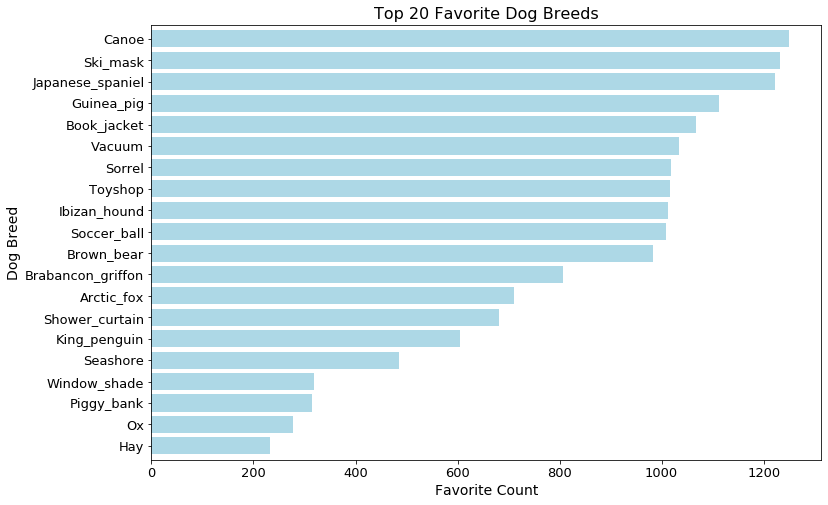

In [96]:
# Data of top 20 retweeted dog breeds
breed_retweet = twitter_archive_master_dog.groupby('p1')['favorite_count'].mean().sort_values().head(20)

# Plot horizontal bar chart
breed_retweet.plot(kind='barh', figsize =(12,8), width =0.8, color = 'lightblue')

# Configure bar chart

plt.title ('Top 20 Favorite Dog Breeds', size = 16)
plt.ylabel('Dog Breed', size =14)
plt.xlabel('Favorite Count', size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13);

#### Question 6: Which dog breeds are highly rated?

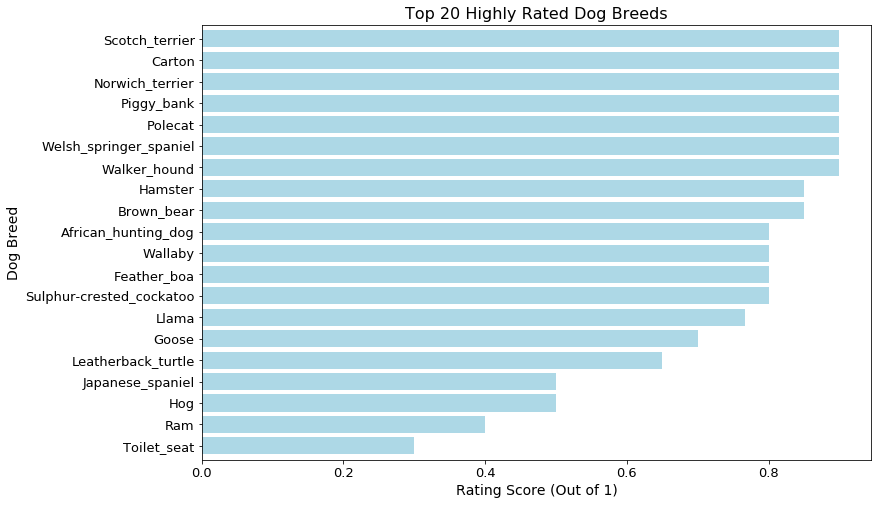

In [97]:
# Data of top 20 retweeted dog breeds
breed_retweet = twitter_archive_master_dog.groupby('p1')['rating_score'].mean().sort_values().head(20)

# Plot horizontal bar chart
breed_retweet.plot(kind='barh', figsize =(12,8), width =0.8, color = 'lightblue')

# Configure bar chart

plt.title ('Top 20 Highly Rated Dog Breeds', size = 16)
plt.ylabel('Dog Breed', size =14)
plt.xlabel('Rating Score (Out of 1)', size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13);

#### Question 7: What is the trend in favorite and retweet count over time?

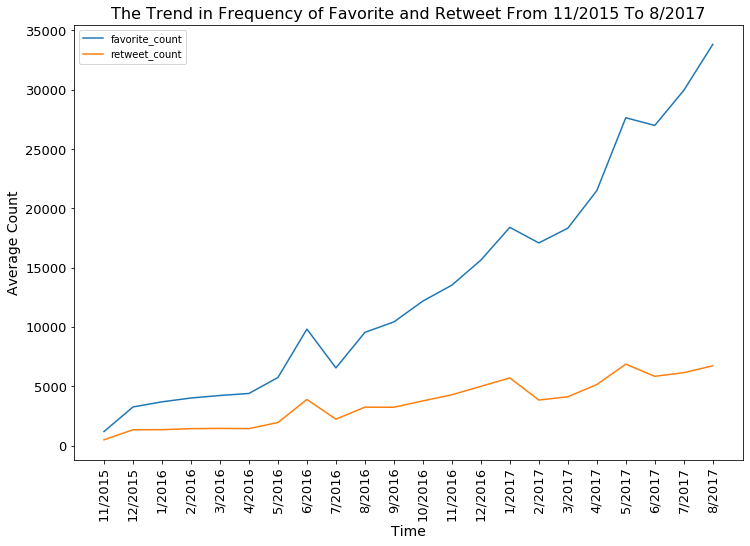

In [98]:
#Create the label for x-axis
xlabel = (twitter_archive_master.month.astype(str) + '/' + twitter_archive_master.year.astype(str)).unique().tolist()
xlabel.reverse()

#create line graph
df1 = twitter_archive_master.groupby(['year', 'month'])[['favorite_count','retweet_count']].mean().sort_values(by= ['year','month'])
df1.plot(kind ='line', figsize =(12,8))

#configure line graph
plt.title ('The Trend in Frequency of Favorite and Retweet From 11/2015 To 8/2017', size = 16)
plt.ylabel('Average Count', size =14)
plt.xlabel('Time', size = 14)
plt.xticks(np.arange(22),xlabel,  size = 13, rotation = 90)
plt.yticks(size = 13);

#### Question 8: What sources have highest number of retweet and favorite?

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


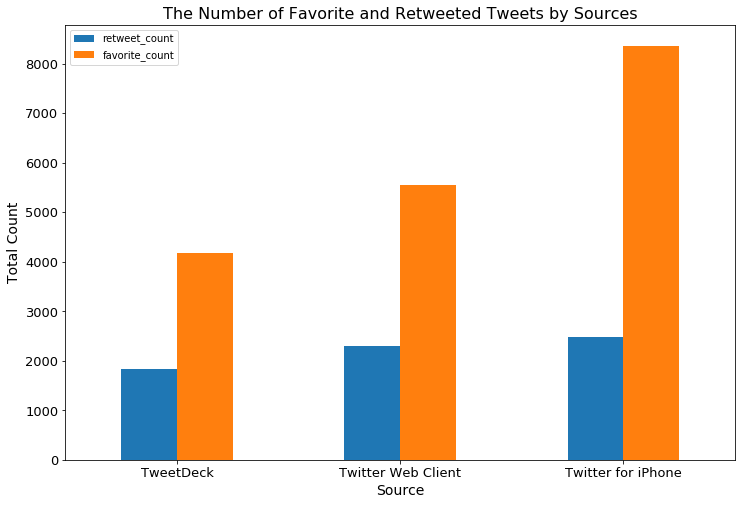

In [99]:
# Plot bar chart
twitter_archive_master.groupby('source')['retweet_count','favorite_count'].mean().plot(kind = 'bar', figsize = (12,8))

# Configure bar chart
plt.title ('The Number of Favorite and Retweeted Tweets by Sources', size = 16)
plt.legend 
plt.ylabel('Total Count', size =14)
plt.xlabel('Source', size = 14)
plt.xticks(size = 13, rotation = 0)
plt.yticks(size = 13);

#### Question 9: What is the number of tweets per weekday at WeRateDogs?

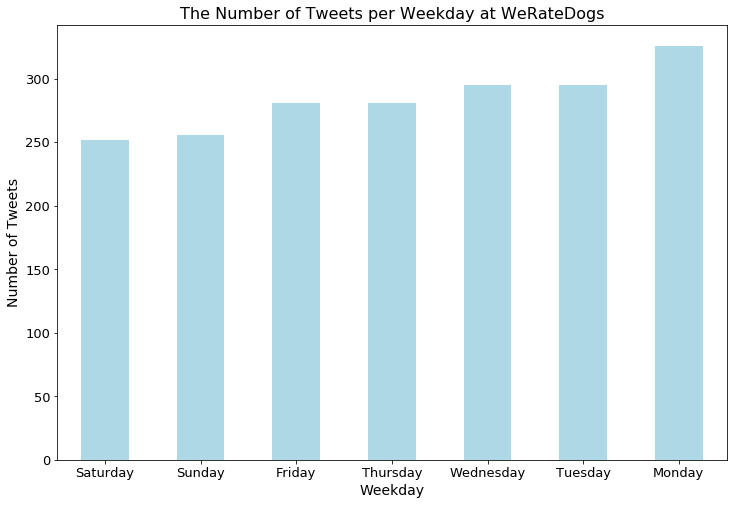

In [100]:
# Prepare data
tweet_weekday = twitter_archive_master.weekday.value_counts().sort_values()

# Plot bar chart
tweet_weekday.plot(kind ='bar', figsize = (12,8), color = 'lightblue')

# Configure bar chart
plt.title ('The Number of Tweets per Weekday at WeRateDogs', size = 16)
plt.ylabel('Number of Tweets', size =14)
plt.xlabel('Weekday', size = 14)
plt.xticks(  size = 13, rotation = 0)
plt.yticks(size = 13);